<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
مبانی بینایی 3 بعدی (پاییز 1402)
        </font>
		<p></p>
        <h1 style="text-align: center">
        تمرین اول - بخش عملی
        </h1>
		<h2 style="text-align: center">
        نام و نام خانوادگی: محمدپیام تائبی
		<br>
		شماره دانشجویی: 400104867 
		<br>
		</h2>		 
		</h3>
            
  

<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 1
        </font>
		<p></p>
		<hr>
       الف- ماتریس زیر را در نظر بگیرید، با استفاده از کتابخانه‌های موجود یک 2D DFT بر روی آن اعمال کنید و به فضای فرکانس ببرید و نتیجه را چاپ نمایید.
	   <br>
	</font>
</div>

In [1]:
from IPython.display import display, Math, Latex
print("طبق رابطه ی زیر تابعی مینویسیم که DFT را پیاده سازی کند.")
display(Math(r'F[k, l]=\frac{1}{M N} \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f[m, n] e^{-j 2 \pi\left(\frac{k}{M} m+\frac{l}{N} n\right)}'))
print("برای اینکه از صحت تابعی که نوشتیم مطمئن شویم یک بار هم با خروجی که تابع فوریه نامپای دارد مقایسه میکنیم")

طبق رابطه ی زیر تابعی مینویسیم که DFT را پیاده سازی کند.


<IPython.core.display.Math object>

برای اینکه از صحت تابعی که نوشتیم مطمئن شویم یک بار هم با خروجی که تابع فوریه نامپای دارد مقایسه میکنیم


In [2]:
def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X


def dft2d(arr,show_details = False):
    count = 0
    M, N = arr.shape 
    dft2d = np.zeros((M,N), dtype=complex)
    for k in range(M):
        for l in range(N):
            sum_matrix = 0.0
            for m in range(M):
                for n in range(N):
                    sum_matrix +=  arr[m,n] * (cmath.exp(- 2j * np.pi * ((k * m) / M + (l * n) / N)))
            dft2d[k,l] = sum_matrix
            count += 1
            if show_details:
                i = (count / (M * N)) * 100
                sys.stdout.write("\rDoing thing %f from 100" % i)
                sys.stdout.flush()
    return dft2d

<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
      برای سریع تر کردن الگوریتم و خارج کردنش از O(n^4) از الگوریتم Cooley Turkey کمک گرفتم اما دقیقا مثل آن را نزدم چون باید ماتریس عکس را به شکل توانی از دو در میاوردم و این الگوریتم O(n^2log^2(n)) دارد اما الگوریتمی که من‌پیاده سازی کردم O(n^3) است اما در اوردر این تمرین به سرعت و خوبی کار میکند.
</font> 
</div>

In [3]:
def fft(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft(x[0::2])
    odd = fft(x[1::2])
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

def fft2d(input_matrix):
    fft_rows = np.apply_along_axis(dft, 1, input_matrix)
    fft_cols = np.apply_along_axis(dft, 1, fft_rows.T)
    fft_2d = fft_cols.T

    return fft_2d


Original Matrix:
 [[ 3  4 -3  1  2]
 [ 6  5 -4  8 -6]
 [-7  1  5  7  9]
 [-9 -2  5  6  3]
 [ 9  6  8 -2  5]]

My Discrete Fourier Transform:
 [[ 60.         +0.j         -14.73606798 +4.33901075j
  -10.26393202 -9.1472939j  -10.26393202 +9.1472939j
  -14.73606798 -4.33901075j]
 [  3.2532889  +9.11453775j  40.08610463-11.63719218j
  -10.        -14.49036173j  40.02379874 +8.75126649j
   29.53444185+16.6497449j ]
 [-15.7532889 +21.40502748j -12.52379874+19.86618572j
  -32.58610463 -4.56352474j   0.46555815-12.05346401j
  -10.         -6.3268805j ]
 [-15.7532889 -21.40502748j -10.         +6.3268805j
    0.46555815+12.05346401j -32.58610463 +4.56352474j
  -12.52379874-19.86618572j]
 [  3.2532889  -9.11453775j  29.53444185-16.6497449j
   40.02379874 -8.75126649j -10.        +14.49036173j
   40.08610463+11.63719218j]]

My Discrete Fast Fourier Transform:
 [[ 60.         +0.j         -14.73606798 +4.33901075j
  -10.26393202 -9.1472939j  -10.26393202 +9.1472939j
  -14.73606798 -4.33901075j]
 

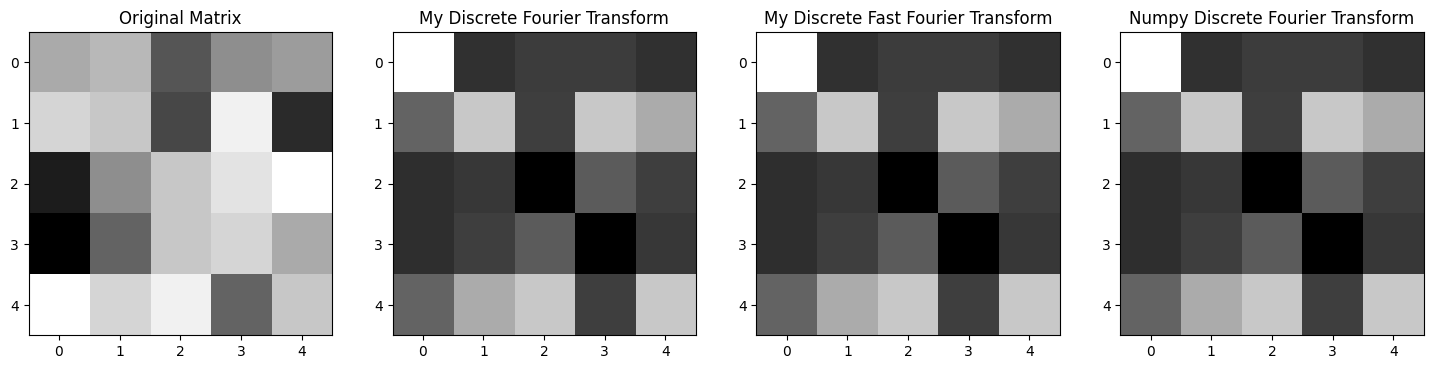

همانطور که دیدید تابع نوشته شده دقیقا خروجی مشابه با DFT از قبل آماده ی نامپای داشت.


In [4]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
import sys
from PIL import Image,ImageDraw




matrix = np.array([[3,4,-3,1,2],
              [6,5,-4,8,-6],
              [-7,1,5,7,9],
              [-9,-2,5,6,3],
              [9,6,8,-2,5]])
 

my_fft =fft2d(matrix)
my_dft_matrix = dft2d(matrix)   
evaluation_dft_matrix = np.fft.fft2(matrix)


print("Original Matrix:\n", matrix)
print("\nMy Discrete Fourier Transform:\n", my_dft_matrix)
print("\nMy Discrete Fast Fourier Transform:\n", my_fft)
print("\nNumpy Discrete Fourier Transform:\n", evaluation_dft_matrix)

plt.figure(figsize=(18,18))
plt.subplot(1,4,1),plt.imshow(matrix, cmap = 'gray')
plt.title('Original Matrix')
plt.subplot(1,4,2),plt.imshow(my_dft_matrix.real, cmap = 'gray')
plt.title('My Discrete Fourier Transform')
plt.subplot(1,4,3),plt.imshow(my_fft.real, cmap = 'gray')
plt.title('My Discrete Fast Fourier Transform')
plt.subplot(1,4,4),plt.imshow(evaluation_dft_matrix.real, cmap = 'gray')
plt.title('Numpy Discrete Fourier Transform')

plt.show()

print("همانطور که دیدید تابع نوشته شده دقیقا خروجی مشابه با DFT از قبل آماده ی نامپای داشت.")

<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
       ب- بدون استفاده از کتابخانه‌های آماده خودتان تابع تبدیل فوریه را بنویسید و تصویر 1.jpg را به فضای فوریه ببرید و نتیجه را چاپ کنید.
</font> 
</div>

<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
       هم با تابع خودم هم با تابع آماده ی نامپای اجرا کردم تا بتوان یکی بودن خروجی ها را دید.
</font> 
</div>

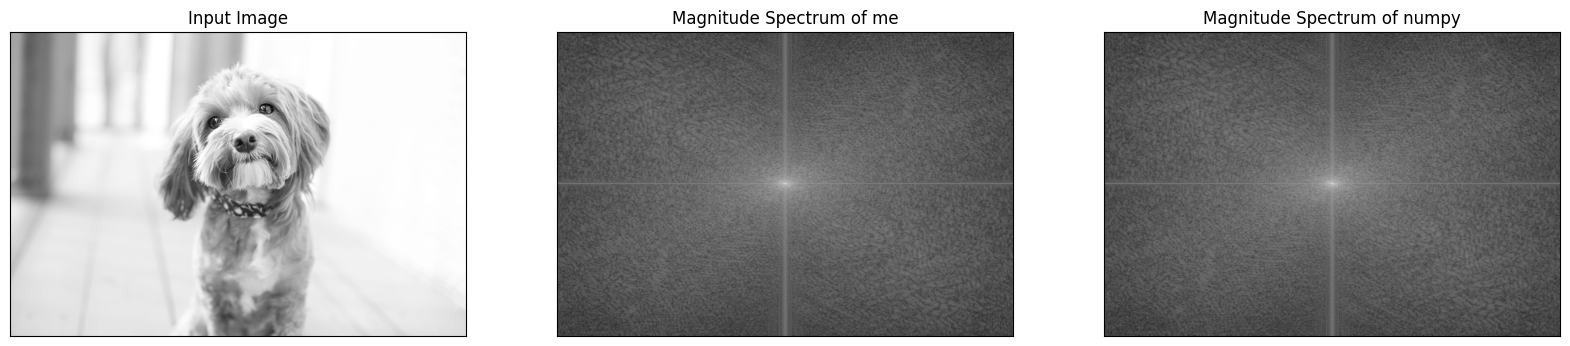

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(r'1.jpg', 0)


#its mine
fft_img = fft2d(img)
magnitude_spectrum = np.fft.fftshift(fft_img)
magnitude_spectrum = 20*np.log(np.abs(magnitude_spectrum))
#its for numpy
fft_np = np.fft.fft2(img)
magnitude_spectrum_np = np.fft.fftshift(fft_np)
magnitude_spectrum_np = 20*np.log(np.abs(magnitude_spectrum_np))

plt.figure(figsize=(20, 5)) 

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum.real, cmap = 'gray')
plt.title('Magnitude Spectrum of me'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(magnitude_spectrum_np.real, cmap = 'gray')
plt.title('Magnitude Spectrum of numpy'), plt.xticks([]), plt.yticks([])
plt.show()

<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 2
        </font>
		<p></p>
		<hr>
       فیلترهای فضایی Smooth کردن تصویر شامل Gaussian Blur, Average Pooling و Low pass filter را خودتان پیاده سازی کرده و بر روی تصویر 2.png اعمال کنید.
	   <br>
	</font>
</div>

In [6]:
def convolve(img , kernel):
    return cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

In [7]:
def average_pooling(img, kernel_size):
    kernel = np.ones(kernel_size, np.float32) / (kernel_size[0] * kernel_size[1])
    return convolve(img , kernel)

In [8]:
def gaussian_blur(image, sigma):
    size = int(2 * np.ceil(3 * sigma) + 1)
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2)/(2*sigma**2)), (size, size))
    kernel /= np.sum(kernel)
    blurred_image = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    
    return blurred_image

In [9]:
def low_pass_filter(img, cutoff_freq):
    img_fft = np.fft.fft2(img)
    img_fft_shifted = np.fft.fftshift(img_fft)
    rows, cols = img.shape
    crow, ccol = int(rows/2), int(cols/2)
    mask = np.zeros((rows, cols), dtype=np.uint8)
    mask[crow-cutoff_freq:crow+cutoff_freq, ccol-cutoff_freq:ccol+cutoff_freq] = 1
    img_fft_filtered = img_fft_shifted * mask
    img_fft_filtered_shifted = np.fft.ifftshift(img_fft_filtered)
    img_filtered = np.abs(np.fft.ifft2(img_fft_filtered_shifted))
    return img_filtered.astype(np.uint8)

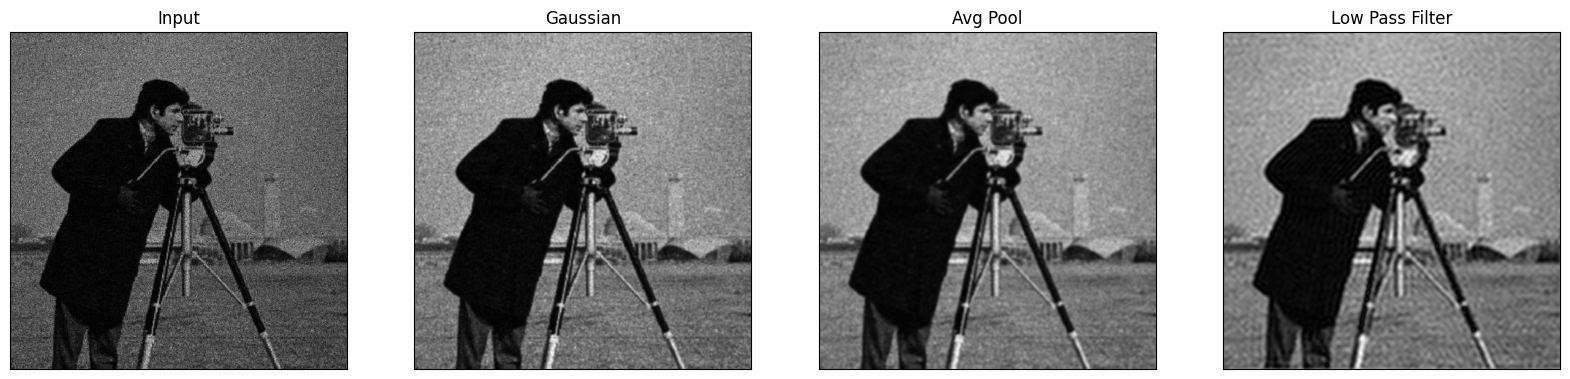

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('2.png', cv2.IMREAD_GRAYSCALE)


avg_pool_img = average_pooling(img, (5, 5))

gaussian_img = gaussian_blur(img, 1)

filtered_image = low_pass_filter(img,50)

plt.figure(figsize=(20, 5))  

plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Input'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(gaussian_img, cmap = 'gray')
plt.title('Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(avg_pool_img, cmap = 'gray')
plt.title('Avg Pool'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(filtered_image, cmap='gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()


<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 3
        </font>
		<p></p>
		<hr>
       تصویر 3.jpg را از ورودی گرفته و تبدیل‌های HSV و YCbCr را بر روی تصاویر اعمال کرده و در خروجی نشان دهید.
	   <br>
	</font>
</div>

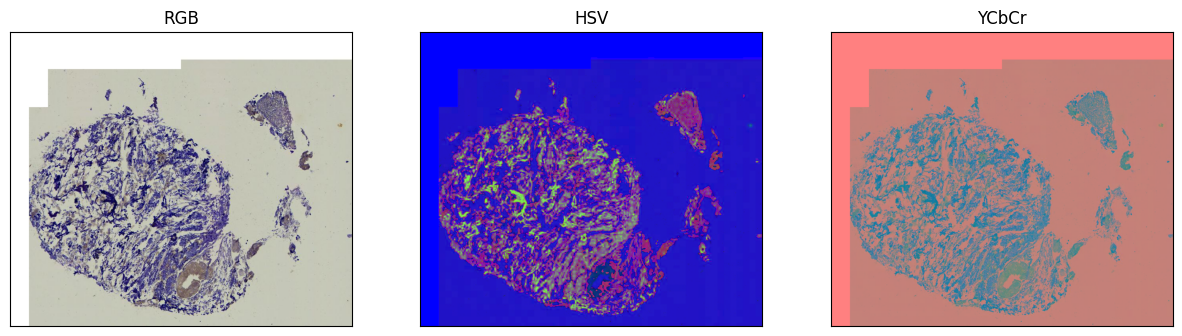

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('3.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
ycbcr_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)


plt.figure(figsize=(15, 5))  

plt.subplot(131),plt.imshow(rgb_img)
plt.title('RGB'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(hsv_img, cmap = 'gray')
plt.title('HSV'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(ycbcr_img, cmap = 'gray')
plt.title('YCbCr'), plt.xticks([]), plt.yticks([])
plt.show()


<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 4
        </font>
		<p></p>
		<hr>
       تصویر 3.jpg را از ورودی گرفته و پس از حذف نویزهای نمک و فلفلی از روی تصویر، بک‌گراند تصویر را حذف کنید. (دقت کنید که بک‌گراند شامل بخش‌های سفیدرنگ و بخش‌های کرمی‌رنگ می‌باشد.)
	   <br>
	</font>
</div>

In [12]:
def show_image(img,text):
    plt.title(text), plt.xticks([]), plt.yticks([])
    plt.show()

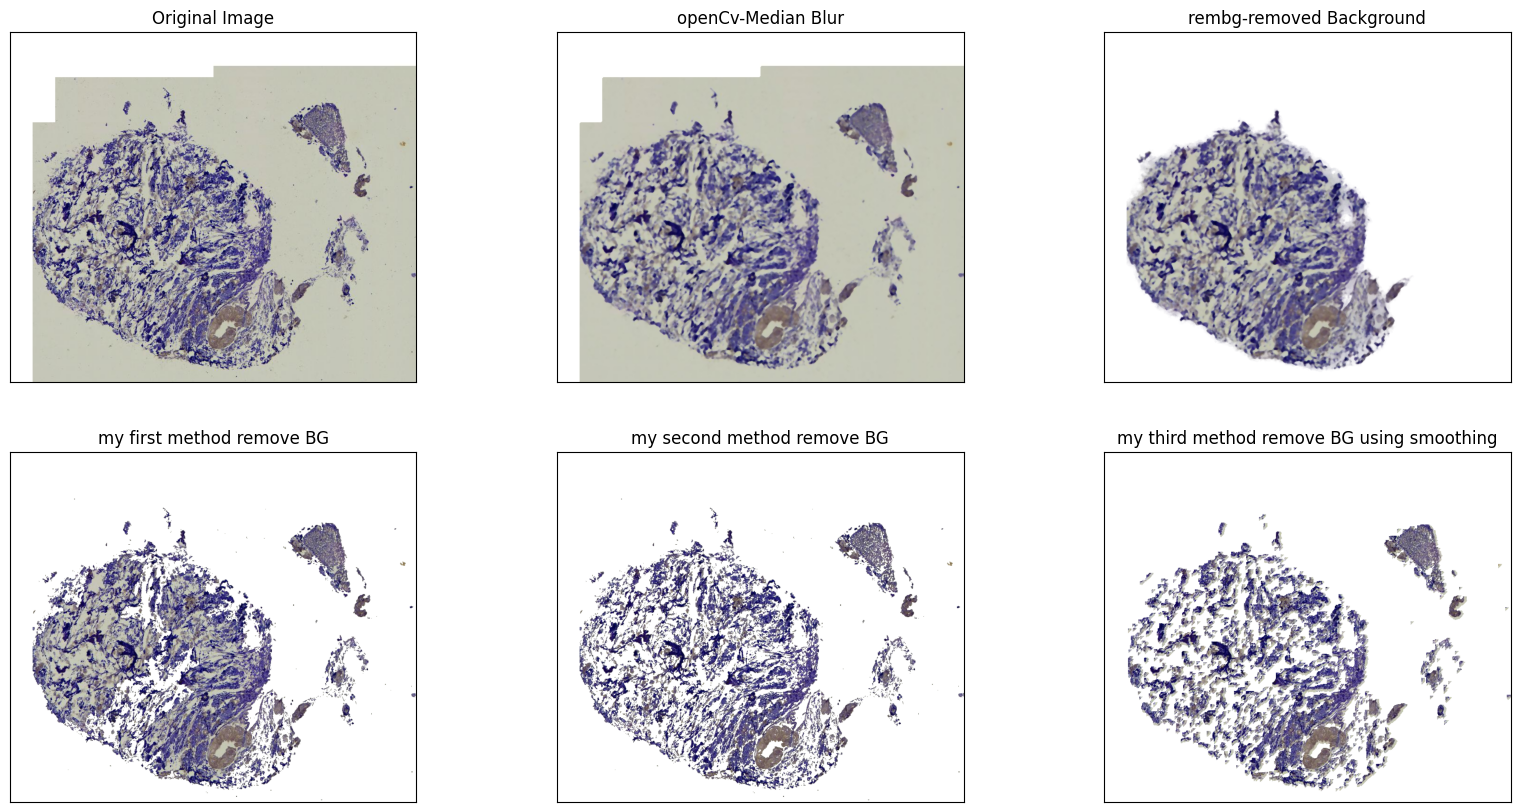

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from rembg import remove 
from PIL import Image 
  

img = cv2.imread('3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
denoised_img = cv2.medianBlur(img,5)
rembg_img = remove(denoised_img,alpha_matting=True)


def my_remove_background(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    mask = np.zeros_like(image)
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

    result = np.where(mask == 255, image, (255, 255, 255)).astype(np.uint8)

    return result

my_rembg_img = my_remove_background(img)
my_rembg_img_2 = img.copy()
my_rembg_img_2[my_rembg_img_2.mean(axis=2)>150] = 255


def my_sec_remove_background(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=3)
    mask = cv2.dilate(mask, kernel, iterations=3)
    
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    
    masked_image[np.where((masked_image==[0,0,0]).all(axis=2))] = [255,255,255]
    
    return masked_image

my_rembg_img_3 = my_sec_remove_background(img)




plt.figure(figsize=(20, 10))

plt.subplot(231),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(denoised_img, cmap = 'gray')
plt.title('openCv-Median Blur'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(rembg_img, cmap = 'gray')
plt.title('rembg-removed Background'), plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(my_rembg_img, cmap = 'gray')
plt.title('my first method remove BG'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(my_rembg_img_2, cmap = 'gray')
plt.title('my second method remove BG'), plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(my_rembg_img_3, cmap = 'gray')
plt.title('my third method remove BG using smoothing'), plt.xticks([]), plt.yticks([])
plt.show()